In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [2]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [3]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [4]:
train_targets[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

여기서 볼 수 있듯이 404개의 훈련 샘플과 102개의 테스트 샘플이 있고 모두 13개의 수치 특성을 가지고 있습니다. 13개의 특성은 다음과 같습니다:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

타깃은 주택의 중간 가격으로 천달러 단위입니다:



In [5]:
train_data[3] # 각각 특성 스케일이 다르니 스케일링 ㄱㄱ

array([3.9610e-02, 0.0000e+00, 5.1900e+00, 0.0000e+00, 5.1500e-01,
       6.0370e+00, 3.4500e+01, 5.9853e+00, 5.0000e+00, 2.2400e+02,
       2.0200e+01, 3.9690e+02, 8.0100e+00])

In [6]:
mean = train_data.mean(axis = 0); mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [7]:
std = train_data.std(axis = 0); std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [0]:
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [0]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1)) # 마지막 층은 순수한 선형
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model

# K-Fold Cross Varidation

In [10]:
len(train_data)

404

In [11]:
(len(train_data) // 4)

101

In [16]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []
for i in range(k):
  print('처리 중인 폴드: ', i)
  val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]], axis = 0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
       axis = 0)
  
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs = num_epochs, batch_size = 1, verbose = 2)
  # k fold는 validation set이 필요없음
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 2)
  all_scores.append(val_mae)

처리 중인 폴드:  0
Epoch 1/100
 - 1s - loss: 209.1323 - mean_absolute_error: 10.9042
Epoch 2/100
 - 1s - loss: 29.5758 - mean_absolute_error: 3.7729
Epoch 3/100
 - 1s - loss: 21.2572 - mean_absolute_error: 3.1505
Epoch 4/100
 - 1s - loss: 18.3014 - mean_absolute_error: 2.8771
Epoch 5/100
 - 1s - loss: 16.5630 - mean_absolute_error: 2.7708
Epoch 6/100
 - 1s - loss: 14.8827 - mean_absolute_error: 2.5936
Epoch 7/100
 - 1s - loss: 13.8877 - mean_absolute_error: 2.5248
Epoch 8/100
 - 1s - loss: 13.0325 - mean_absolute_error: 2.4573
Epoch 9/100
 - 1s - loss: 12.6321 - mean_absolute_error: 2.3598
Epoch 10/100
 - 1s - loss: 12.7461 - mean_absolute_error: 2.4109
Epoch 11/100
 - 1s - loss: 11.3305 - mean_absolute_error: 2.2671
Epoch 12/100
 - 1s - loss: 11.6846 - mean_absolute_error: 2.3013
Epoch 13/100
 - 1s - loss: 11.0370 - mean_absolute_error: 2.1441
Epoch 14/100
 - 1s - loss: 10.7284 - mean_absolute_error: 2.2122
Epoch 15/100
 - 1s - loss: 10.0840 - mean_absolute_error: 2.1880
Epoch 16/100
 - 1s 

In [0]:
a = np.array([[1, 2]])
b = np.array([[3, 4]])
np.concatenate([a, b], axis = 0), np.concatenate([a, b], axis = 1)

(array([[1, 2],
        [3, 4]]), array([[1, 2, 3, 4]]))

In [0]:
all_scores

[1.9907026574163154, 2.289609630509178, 3.0514787777815715, 2.6875150723032433]

In [0]:
np.mean(all_scores)

2.5048265345025773

In [0]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [0]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=2)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
 - 1s - loss: 215.5100 - mean_absolute_error: 10.9434 - val_loss: 39.8906 - val_mean_absolute_error: 4.1201
Epoch 2/500
 - 1s - loss: 31.7800 - mean_absolute_error: 3.8260 - val_loss: 23.7614 - val_mean_absolute_error: 2.9586
Epoch 3/500
 - 1s - loss: 22.0859 - mean_absolute_error: 3.1649 - val_loss: 16.8678 - val_mean_absolute_error: 2.7578
Epoch 4/500
 - 1s - loss: 18.7146 - mean_absolute_error: 2.7885 - val_loss: 15.7098 - val_mean_absolute_error: 2.5178
Epoch 5/500
 - 1s - loss: 16.5239 - mean_absolute_error: 2.6985 - val_loss: 12.7917 - val_mean_absolute_error: 2.3327
Epoch 6/500
 - 1s - loss: 14.7418 - mean_absolute_error: 2.6364 - val_loss: 13.4438 - val_mean_absolute_error: 2.4139
Epoch 7/500
 - 1s - loss: 14.4243 - mean_absolute_error: 2.5364 - val_loss: 10.9180 - val_mean_absolute_error: 2.2159
Epoch 8/500
 - 1s - loss: 13.4169 - mean_absolute_error: 2.4248 - val_loss: 10.5759 - val_mean_absolute_error: 2.0

In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
# 4개의 결과(100 * 4) 나온 것을 각 인덱스 평균으로 해줌

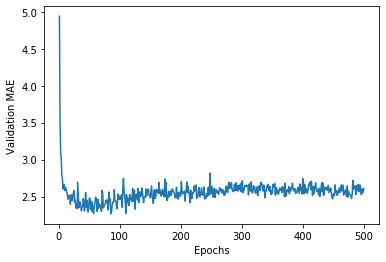

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

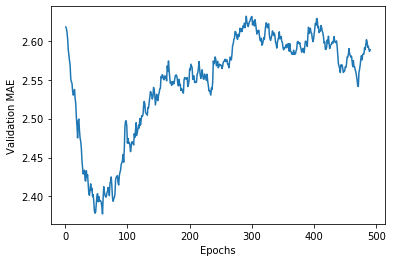

In [0]:
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
average_mae_history[10:20]

[2.6177525756382707,
 2.5978748503297866,
 2.5636152583773772,
 2.527298359587641,
 2.4643566295652106,
 2.5138206458327796,
 2.5168855343714798,
 2.506902030198881,
 2.3964032601602008,
 2.518978484786383]

In [0]:
smooth_mae_history[:10]

[2.6177525756382707,
 2.6157648031074223,
 2.610549848634418,
 2.6022246997297405,
 2.5884378927132876,
 2.5809761680252366,
 2.574567104659861,
 2.567800597213763,
 2.5506608635084067,
 2.5474926256362043]

In [0]:
model = build_model()
model.fit(train_data, train_targets,
          epochs = 80, batch_size = 16, verbose = 1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
404/404 [==============================] - 0s 965us/step - loss: 521.3979 - mean_absolute_error: 20.8665
Epoch 2/80
404/404 [==============================] - 0s 235us/step - loss: 373.7987 - mean_absolute_error: 17.0810
Epoch 3/80
404/404 [==============================] - 0s 246us/step - loss: 201.3447 - mean_absolute_error: 12.0015
Epoch 4/80
404/404 [==============================] - 0s 234us/step - loss: 83.2442 - mean_absolute_error: 7.2195
Epoch 5/80
404/404 [==============================] - 0s 217us/step - loss: 45.6064 - mean_absolute_error: 5.1278
Epoch 6/80
404/404 [==============================] - 0s 225us/step - loss: 30.7101 - mean_absolute_error: 4.1020
Epoch 7/80
404/404 [==============================] - 0s 210us/step - loss: 24.2476 - mean_absolute_error: 3.4864
Epoch 8/80
404/404 [==============================] - 0s 241us/step - loss: 21.1144 - mean_absolute_error: 3.2346
Epoch 9/80
404/404 [==============================] - 0s 265us/step - loss: 19.271

In [0]:
test_mae_score

2.9192497496511423